In [220]:
import pandas as pd
df =pd.read_csv("grand_merge.csv")

In [221]:
year_counts = df['NUMINVES'].value_counts()
year_counts

NUMINVES
2006    22708
2007    22694
2009    22690
2010    22687
2008    22675
17      22663
2004    22096
2003    21133
2002    21006
2001    20631
18      20250
2005    20222
2018    20204
16      20204
2016    20204
2020    20204
2017    20200
23      19205
2000    18038
Name: count, dtype: int64

In [222]:


# Asumiendo que ya tienes el dataframe llamado 'df'

# Paso 1: Reemplazar los valores incorrectos en la columna 'NUMINVES'
df['NUMINVES'] = df['NUMINVES'].replace({
    16: 2011,
    17: 2013,
    18: 2015,
    23: 2023
})




In [223]:
# Contar las ocurrencias de cada valor en la columna 'APOYO'
apoyo_counts = df['APOYO'].value_counts()

# Contar las ocurrencias de cada valor en la columna 'SATISFACCION'
satisfaccion_counts = df['SATISFACCION'].value_counts()

# Mostrar los valores que se repiten en cada columna
print("Valores que se repiten en 'APOYO':")
print(apoyo_counts)

print("\nValores que se repiten en 'SATISFACCION':")
print(satisfaccion_counts)


Valores que se repiten en 'APOYO':
APOYO
1.0    226006
3.0     79430
2.0     61010
Name: count, dtype: int64

Valores que se repiten en 'SATISFACCION':
SATISFACCION
3.0    161235
2.0    104381
4.0     77802
1.0     34740
Name: count, dtype: int64


In [224]:
# Verificar si hay valores NaN en las columnas 'APOYO' y 'SATISFACCION'

# Verificar si hay NaN en 'APOYO'
apoyo_nas = df['APOYO'].isna().sum()

# Verificar si hay NaN en 'SATISFACCION'
satisfaccion_nas = df['SATISFACCION'].isna().sum()

# Mostrar los resultados
print(f"Valores NaN en 'APOYO': {apoyo_nas}")
print(f"Valores NaN en 'SATISFACCION': {satisfaccion_nas}")


Valores NaN en 'APOYO': 33268
Valores NaN en 'SATISFACCION': 21556


In [225]:
df_clean =df.dropna()


In [226]:
paises_dict = {
    32: "Argentina",
    68: "Bolivia",
    76: "Brasil",
    152: "Chile",
    170: "Colombia",
    188: "Costa Rica",
    214: "Rep. Dominicana",
    218: "Ecuador",
    222: "El Salvador",
    320: "Guatemala",
    340: "Honduras",
    484: "México",
    558: "Nicaragua",
    591: "Panamá",
    600: "Paraguay",
    604: "Perú",
    858: "Uruguay",
    862: "Venezuela"
}

# Lista de códigos de países latinoamericanos
paises_latinoamericanos = list(paises_dict.keys())

# Filtrar el DataFrame para mantener solo los países latinoamericanos
df_clean= df_clean[df_clean['IDENPA'].isin(paises_latinoamericanos)]

# Agregar una nueva columna para los nombres de los países
df_clean['Pais'] = df_clean['IDENPA'].map(paises_dict)

# Mostrar el DataFrame filtrado con nombres
print(df_clean)

        NUMINVES  IDENPA  APOYO  SATISFACCION       Pais
0           2000      32    1.0           1.0  Argentina
1           2000      32    1.0           3.0  Argentina
2           2000      32    1.0           3.0  Argentina
3           2000      32    1.0           2.0  Argentina
4           2000      32    1.0           2.0  Argentina
...          ...     ...    ...           ...        ...
399707      2023     862    1.0           3.0  Venezuela
399709      2023     862    2.0           3.0  Venezuela
399711      2023     862    1.0           3.0  Venezuela
399712      2023     862    3.0           4.0  Venezuela
399713      2023     862    2.0           4.0  Venezuela

[334654 rows x 5 columns]


In [227]:
# Invertir la escala de la columna 'SATISFACCION'
df_clean['SATISFACCION'] = df_clean['SATISFACCION'].replace({
    1: 4,  # Muy insatisfecho
    2: 3,  # Insatisfecho
    3: 2,  # Satisfecho
    4: 1   # Muy satisfecho
})

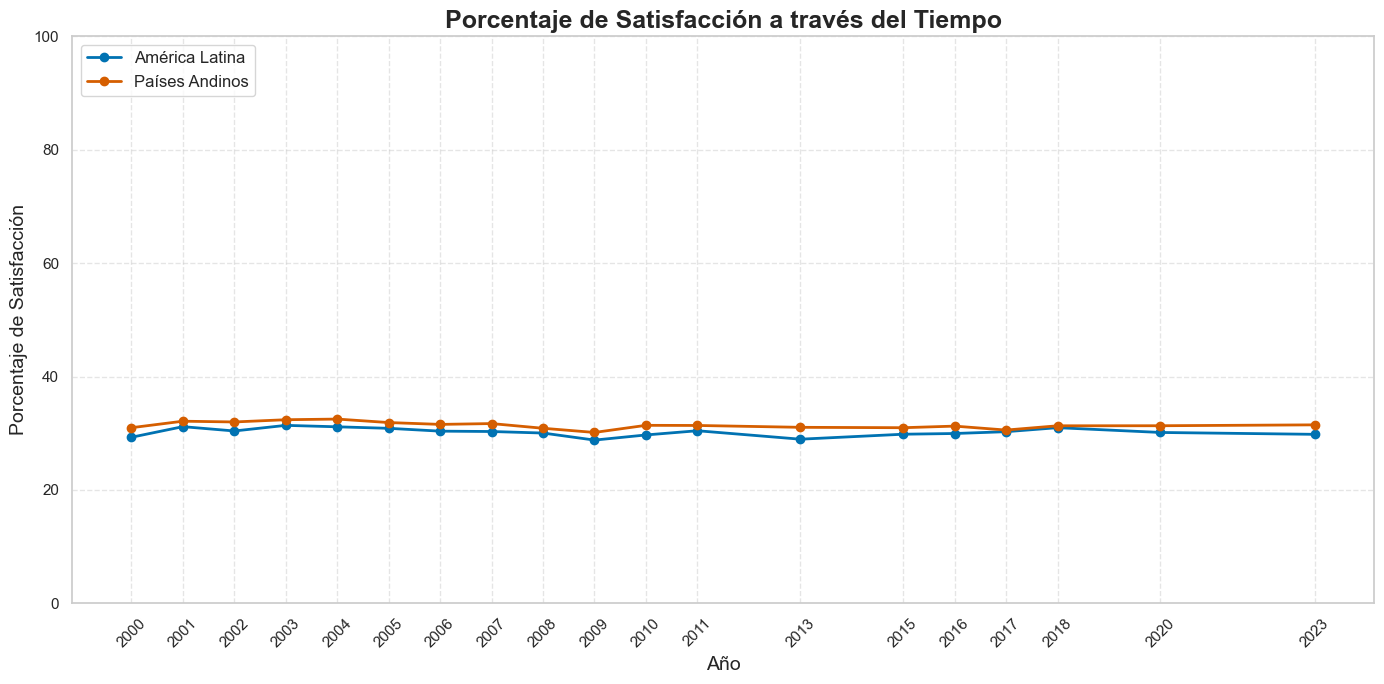

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de satisfacción por año (NUMINVES) para todos los países
total_satisfaccion = df_clean.groupby('NUMINVES')['SATISFACCION'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Calcular el porcentaje de satisfacción para los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']
satisfaccion_andina = df_clean[df_clean['Pais'].isin(paises_andinos)].groupby('NUMINVES')['SATISFACCION'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Promedio de satisfacción
promedio_total = total_satisfaccion[[1, 2, 3]].mean(axis=1)  # Promedio para los niveles de satisfacción
promedio_andinos = satisfaccion_andina[[1, 2, 3]].mean(axis=1)  # Promedio para los niveles de satisfacción

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Graficar usando Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(promedio_total.index, promedio_total, marker='o', label='América Latina', color='#0072B2', linewidth=2)  # Color azul formal
plt.plot(promedio_andinos.index, promedio_andinos, marker='o', label='Países Andinos', color='#D55E00', linewidth=2)  # Color naranja formal

# Añadir etiquetas y título
plt.title('Porcentaje de Satisfacción a través del Tiempo', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje de Satisfacción', fontsize=14)

# Asegurarse de que se muestren los años
plt.xticks(promedio_total.index, rotation=45)

# Ajustar el eje Y para que se vea del 0 al 100
plt.ylim(0, 100)

# Mejorar la estética
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


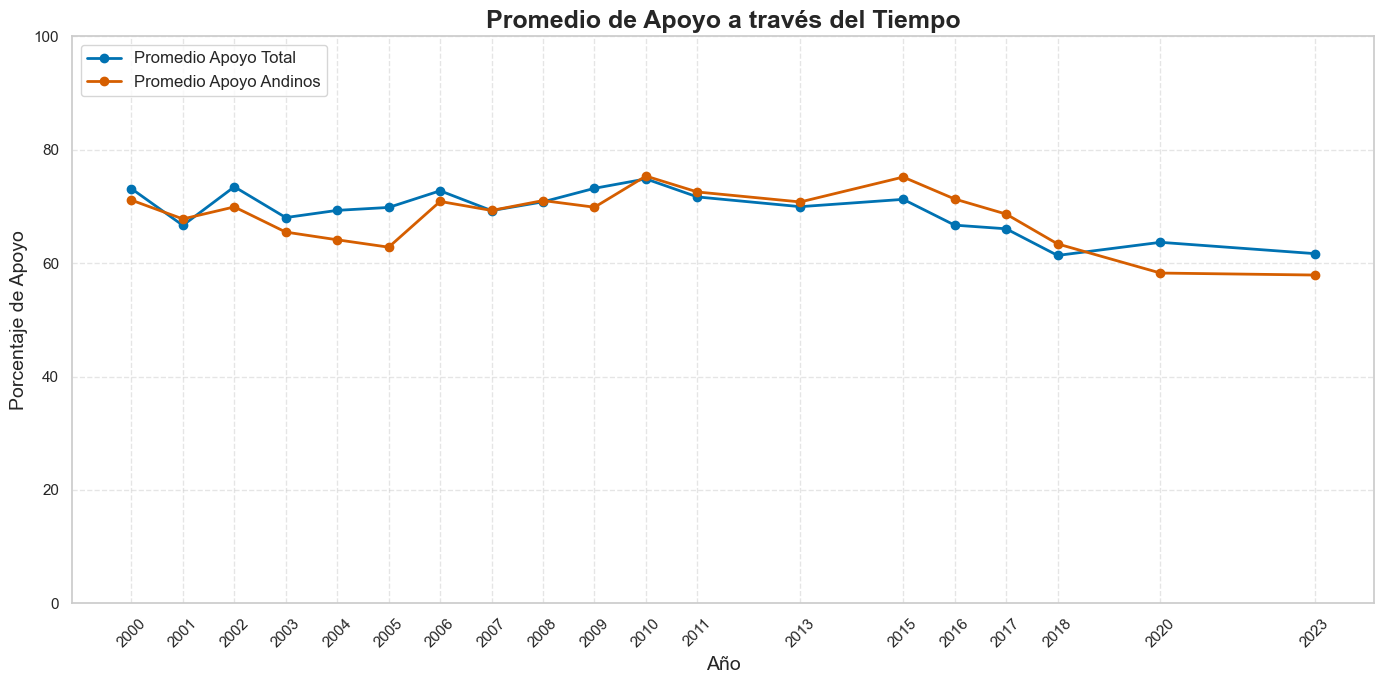

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear la variable de APOYO a valores numéricos
df_clean['APOYO'] = df_clean['APOYO'].replace({
    1: 1,  # Apoyo pleno
    2: 0.5,  # Apoyo medio
    3: 0   # Sin apoyo
})

# Calcular el promedio de apoyo por año (NUMINVES) para todos los países
promedio_apoyo_total = df_clean.groupby('NUMINVES')['APOYO'].mean() * 100

# Calcular el promedio de apoyo por año para los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']
promedio_apoyo_andinos = df_clean[df_clean['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean() * 100

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Graficar usando Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(promedio_apoyo_total.index, promedio_apoyo_total, marker='o', label='Promedio Apoyo Total', color='#0072B2', linewidth=2)
plt.plot(promedio_apoyo_andinos.index, promedio_apoyo_andinos, marker='o', label='Promedio Apoyo Andinos', color='#D55E00', linewidth=2)

# Añadir etiquetas y título
plt.title('Promedio de Apoyo a través del Tiempo', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje de Apoyo', fontsize=14)

# Asegurarse de que se muestren los años
plt.xticks(promedio_apoyo_total.index, rotation=45)

# Ajustar el eje Y para que se vea del 0 al 100
plt.ylim(0, 100)

# Mejorar la estética
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


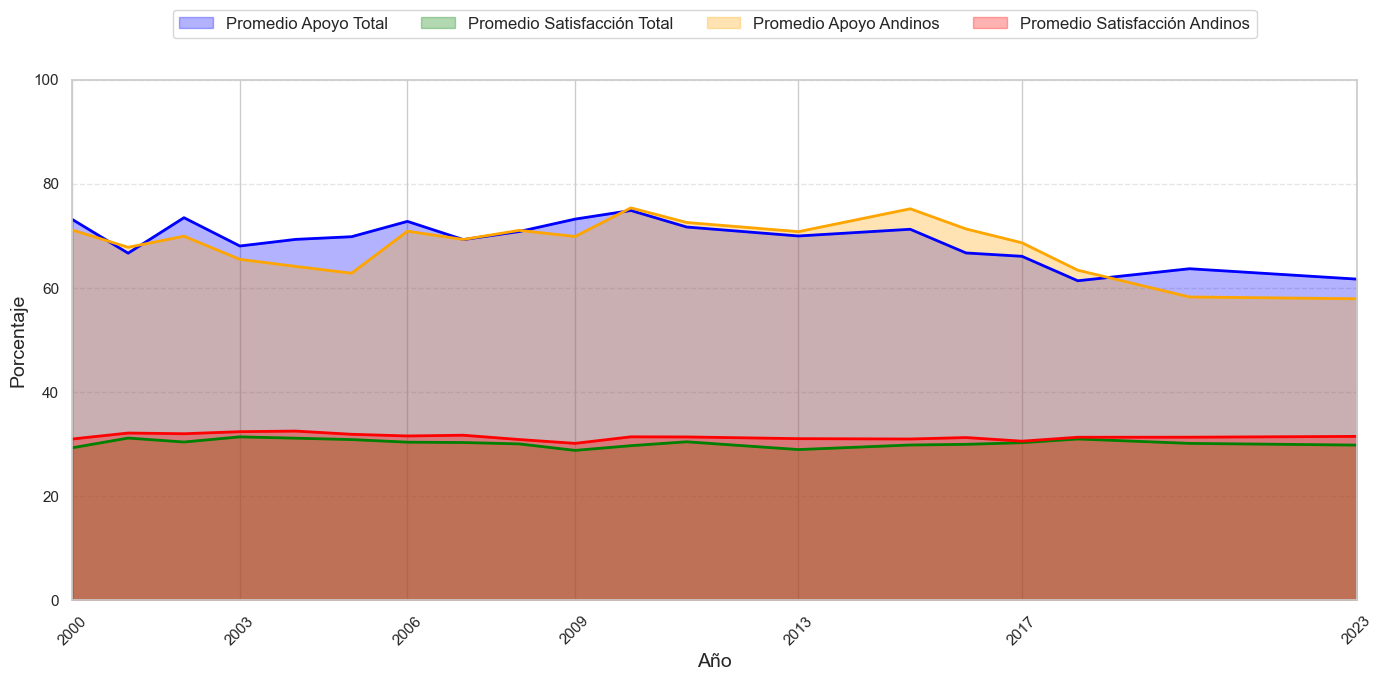

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de satisfacción por año (NUMINVES) para todos los países
promedio_satisfaccion_total = promedio_total
promedio_satisfaccion_andinos = promedio_andinos

# Crear un DataFrame para el gráfico
plot_data = pd.DataFrame({
    'Año': promedio_apoyo_total.index,
    'Promedio Apoyo Total': promedio_apoyo_total,
    'Promedio Satisfacción Total': promedio_satisfaccion_total,
    'Promedio Apoyo Andinos': promedio_apoyo_andinos,
    'Promedio Satisfacción Andinos': promedio_satisfaccion_andinos
})

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Graficar usando un gráfico de área
plt.figure(figsize=(14, 7))

# Gráfico para América Latina
plt.fill_between(plot_data['Año'], plot_data['Promedio Apoyo Total'], color='blue', alpha=0.3, label='Promedio Apoyo Total')
plt.plot(plot_data['Año'], plot_data['Promedio Apoyo Total'], color='blue', linewidth=2)

plt.fill_between(plot_data['Año'], plot_data['Promedio Satisfacción Total'], color='green', alpha=0.3, label='Promedio Satisfacción Total')
plt.plot(plot_data['Año'], plot_data['Promedio Satisfacción Total'], color='green', linewidth=2)

# Gráfico para Países Andinos
plt.fill_between(plot_data['Año'], plot_data['Promedio Apoyo Andinos'], color='orange', alpha=0.3, label='Promedio Apoyo Andinos')
plt.plot(plot_data['Año'], plot_data['Promedio Apoyo Andinos'], color='orange', linewidth=2)

plt.fill_between(plot_data['Año'], plot_data['Promedio Satisfacción Andinos'], color='red', alpha=0.3, label='Promedio Satisfacción Andinos')
plt.plot(plot_data['Año'], plot_data['Promedio Satisfacción Andinos'], color='red', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)

# Asegurarse de que se muestren los años
plt.xticks(plot_data['Año'][::3], rotation=45)  # Cada tres años

# Ajustar el eje Y para que se vea del 0 al 100
plt.ylim(0, 100)
plt.xlim(plot_data['Año'].min(), plot_data['Año'].max())  # Asegurarse de que el 2000 esté pegado al eje Y

# Mejorar la estética
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Centrar la leyenda en la parte superior
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


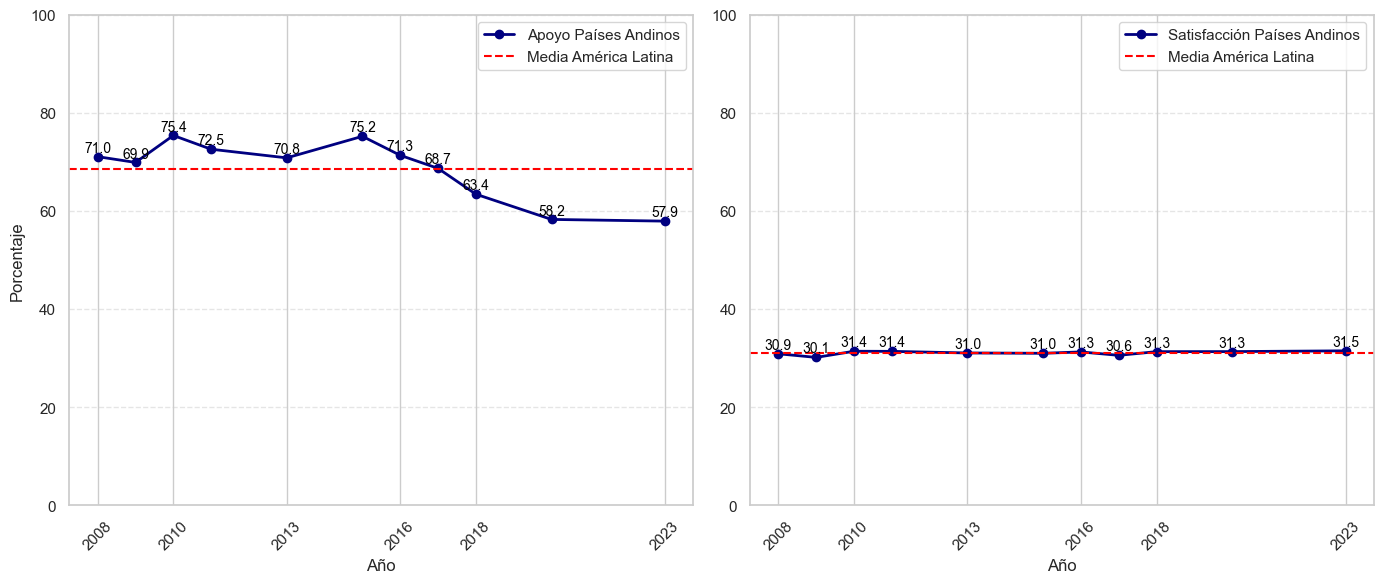

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo los años de 2008 a 2023
df_clean_filtered = df_clean[df_clean['NUMINVES'].between(2008, 2023)]

# Calcular el promedio de apoyo por año (NUMINVES) para países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']
promedio_apoyo_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean() * 100

# Calcular el promedio de satisfacción por año (NUMINVES) para países andinos
total_satisfaccion = df_clean_filtered.groupby('NUMINVES')['SATISFACCION'].value_counts(normalize=True).unstack(fill_value=0) * 100
satisfaccion_andina = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['SATISFACCION'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Promedio de satisfacción
promedio_total_sat = total_satisfaccion[[1, 2, 3]].mean(axis=1)  # Promedio para los niveles de satisfacción
promedio_andinos_sat = satisfaccion_andina[[1, 2, 3]].mean(axis=1)  # Promedio para los niveles de satisfacción

# Calcular la media de América Latina
media_latam_apoyo = promedio_apoyo_andinos.mean()
media_latam_satisfaccion = promedio_andinos_sat.mean()

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Crear una figura con dos subgráficas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Apoyo
axs[0].plot(promedio_apoyo_andinos.index, promedio_apoyo_andinos, marker='o', color='navy', label='Apoyo Países Andinos', linewidth=2)
axs[0].axhline(media_latam_apoyo, color='red', linestyle='--', label='Media América Latina', linewidth=1.5)

# Añadir etiquetas y título
axs[0].set_xlabel('Año', fontsize=12)
axs[0].set_ylabel('Porcentaje', fontsize=12)
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)
axs[0].legend()

# Ajustar el eje X para mostrar solo algunos años
axs[0].set_xticks(promedio_apoyo_andinos.index[::2])  # Muestra cada 2 años
axs[0].set_xticklabels(promedio_apoyo_andinos.index[::2], rotation=45, ha='center')  # Ajusta la rotación y centrado

# Añadir porcentajes en los nodos
for x, y in zip(promedio_apoyo_andinos.index, promedio_apoyo_andinos):
    axs[0].text(x, y + 1, f'{y:.1f}', ha='center', fontsize=10, color='black')

# Gráfico de Satisfacción
axs[1].plot(promedio_andinos_sat.index, promedio_andinos_sat, marker='o', color='navy', label='Satisfacción Países Andinos', linewidth=2)
axs[1].axhline(media_latam_satisfaccion, color='red', linestyle='--', label='Media América Latina', linewidth=1.5)

# Añadir etiquetas y título
axs[1].set_xlabel('Año', fontsize=12)
axs[1].set_ylim(0, 100)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1].legend()

# Ajustar el eje X para mostrar solo algunos años
axs[1].set_xticks(promedio_andinos_sat.index[::2])  # Muestra cada 2 años
axs[1].set_xticklabels(promedio_andinos_sat.index[::2], rotation=45, ha='center')  # Ajusta la rotación y centrado

# Añadir porcentajes en los nodos
for x, y in zip(promedio_andinos_sat.index, promedio_andinos_sat):
    axs[1].text(x, y + 1, f'{y:.1f}', ha='center', fontsize=10, color='black')

# Ajustar el layout
plt.tight_layout()
plt.show()


In [249]:
df_clean.to_csv('grand_merge_2.csv', index=False)
